In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from gpt.element import Lattice
from gpt.maps import Map25D_TM
from gpt.element import Screen
from gpt import GPT
from pmd_beamphysics import single_particle

from distgen.physical_constants import qe, c, MC2
import os

MC2=MC2.magnitude
c = c.magnitude

def p2e(p):
    p=np.array(p)
    return np.sqrt(p**2 + MC2**2)

def e2p(E):
    return np.sqrt(E**2-MC2**2)

def p2g(p):
    return np.sqrt((p/MC2)**2 - 1)

def p2b(p):
    return np.sqrt(1-1/p2g(p)**2)


In [3]:
lat = Lattice('Linac-Example')

cnames={'z':'z', 'r':'r', 'Ez':'Ez', 'Er':'Er', 'Bphi':'Bphi'}

lat.add(Map25D_TM('cav01', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=6e6), ds=0)
lat.add(Map25D_TM('cav02', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=6e6), ds=0.25)
lat.add(Map25D_TM('cav03', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=6e6), ds=0.25)
lat.add(Map25D_TM('cav04', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=6e6, relative_phase=-180), ds=0.25)
lat.add(Map25D_TM('cav05', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=6e6, relative_phase=-180), ds=0.25)
lat.add(Map25D_TM('cav06', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9, scale=6e6, relative_phase=-180), ds=0.25)

lat.add(Screen('scr'), ds=0.25)

Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"
Field map does not contain item "R"


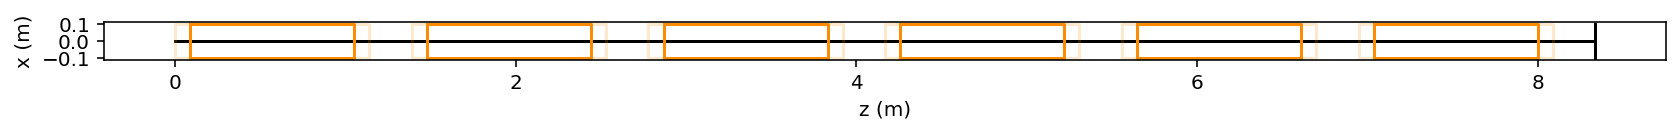

In [4]:
plt.figure(figsize=(14,5))
lat.plot_floor();

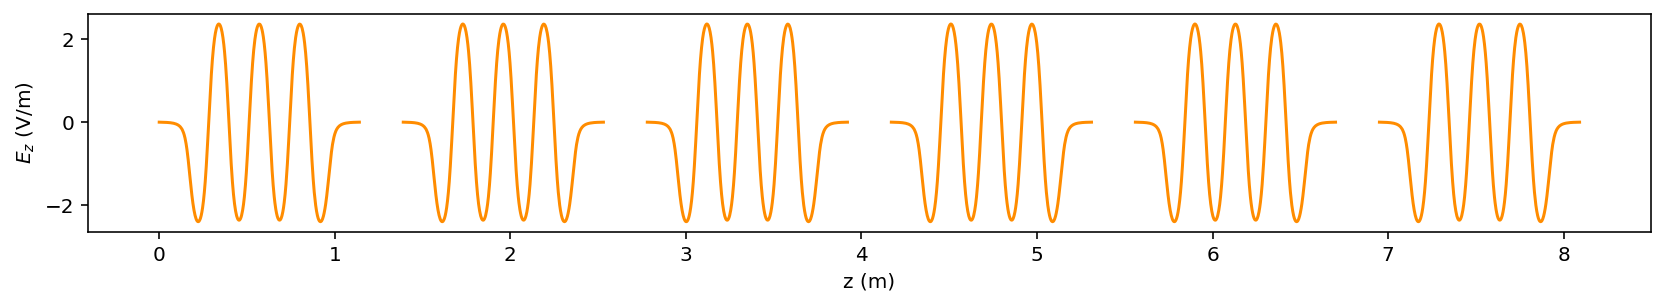

In [5]:
plt.figure(figsize=(14,2))
lat.plot_field_profile();

In [6]:
from gpt.autoscale import autophase1
from gpt.autoscale import autoscale1

In [7]:
%time ts, ps, zs, runs, G = autophase1(lat, 0, p=e2p(6e6)) 


> Phasing: cav01
   t_beg = 0 sec.
   s_beg = 0 m.
   scale = 6000000.0.
   relative phase = 0 deg.

   t_end = 3.810095829595983e-09 m.
   s_end = 1.14 m.
   oncrest phase = 7.736146226624442
   energy gain =  5985934.001 eV.

> Tracking: cav01:cav02
   energy gain: -8.143095549570357e-14 eV.

> Phasing: cav02
   t_beg = 4.644764956285569e-09 sec.
   s_beg = 1.39 m.
   scale = 6000000.0.
   relative phase = 0 deg.

   t_end = 8.449760714942752e-09 m.
   s_end = 2.53 m.
   oncrest phase = -4.318216873913116
   energy gain =  5995089.163 eV.

> Tracking: cav02:cav03
   energy gain: 4.49578417974334e-14 eV.

> Phasing: cav03
   t_beg = 9.284007901559267e-09 sec.
   s_beg = 2.78 m.
   scale = 6000000.0.
   relative phase = 0 deg.

   t_end = 1.3087805373502145e-08 m.
   s_end = 3.92 m.
   oncrest phase = -15.127502597674038
   energy gain =  5997323.361 eV.

> Tracking: cav03:cav04
   energy gain: -1.0719881386643073e-14 eV.

> Phasing: cav04
   t_beg = 1.3921905037159678e-08 sec.
   s_b

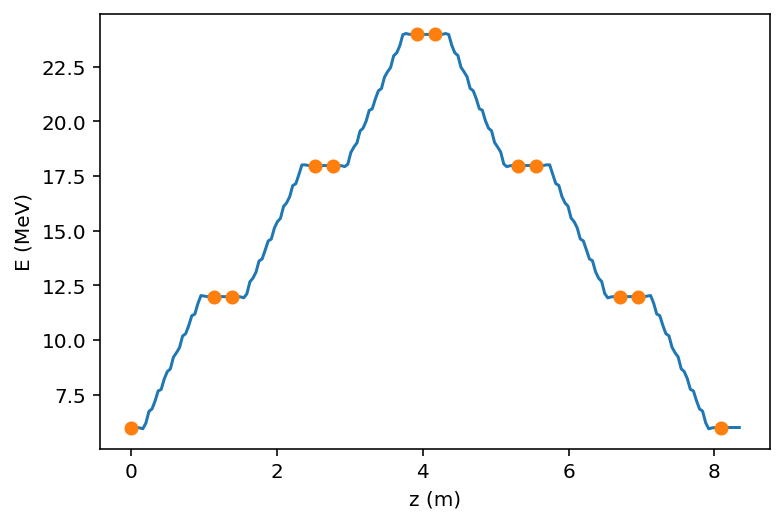

In [8]:
plt.plot(G.screen_stat('mean_z'), G.screen_stat('mean_energy')/1e6);
plt.plot(zs, p2e(ps)/1e6,'o');
plt.xlabel('z (m)');
plt.ylabel('E (MeV)');

In [9]:
GUN_FILE = os.path.abspath('fields/gun_0mm.gdf');
SOL1_FILE = os.path.abspath('fields/B_FIELD.gdf');
SOL2_FILE = os.path.abspath('fields/transport_sole_map.gdf');
CAV0_FILE = os.path.abspath('fields/197MHz.gdf');
CAV3_FILE = os.path.abspath('fields/591MHz.gdf');

f0 = 197e6
f3 = 591e6

from gpt.maps import Map2D_E
from gpt.maps import Map1D_B
from gpt.maps import Map1D_TM
from gpt.bstatic import Sectormagnet
from gpt.element import Screen

In [10]:
gun = Lattice('gun')
gun_cnames={'R':'r', 'Z':'z', 'Er':'Er', 'Ez':'Ez', '|E|':'|E|', 'V':'V'}
gun.add(Map2D_E('dcgun', 
                GUN_FILE, 
                column_names=gun_cnames, 
                field_pos='end', 
                scale=4/5), 
        ds=0)

gun.add(Map1D_B('sol1', 
                SOL1_FILE, 
                scale=3.0),
        ds=0.33, 
        ref_element='beg', 
        element_origin='center')

tgun, pgun, zgun, sgun, rgun, Ggun = autoscale1(gun, t=0, p=100)

autoscale1: no cavities to phase

> Tracking: BEG:END
   energy gain: 399991.8381057344 eV.


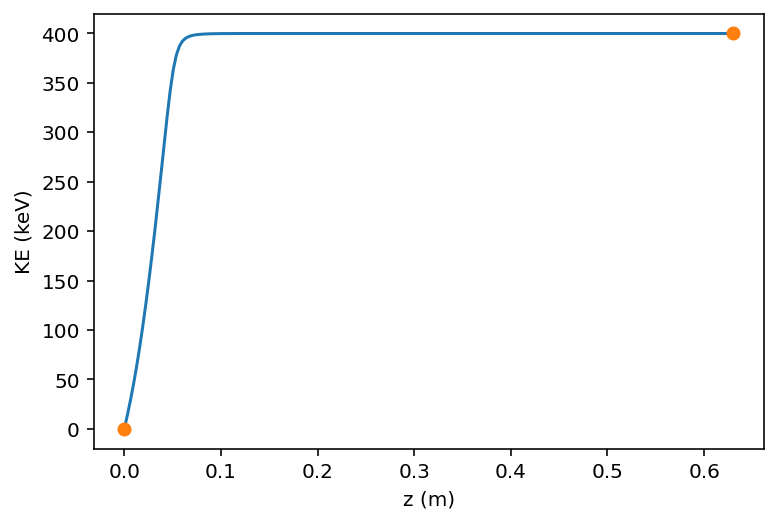

In [11]:
plt.plot(Ggun.screen_stat('mean_z'), Ggun.screen_stat('mean_kinetic_energy')/1e3);
plt.plot(sgun, (p2e(pgun)-MC2)/1000,'o');
plt.xlabel('z (m)');
plt.ylabel('KE (keV)');

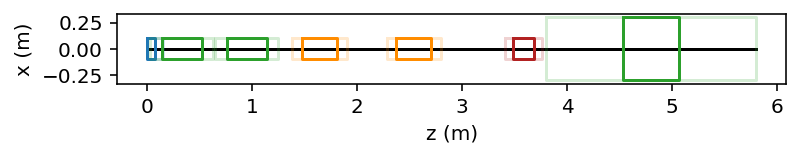

In [11]:
#------------------------------------------------------------------------------------------------
# Injector
#------------------------------------------------------------------------------------------------
injector = Lattice('injector')

gun_cnames={'R':'r', 'Z':'z', 'Er':'Er', 'Ez':'Ez', '|E|':'|E|', 'V':'V'}
injector.add(Map2D_E('dcgun', 
                     GUN_FILE, 
                     column_names=gun_cnames, 
                     field_pos='end', 
                     scale=4/5), 
             ds=0)

injector.add(Map1D_B('sol1', 
                     SOL1_FILE, 
                     scale=3.0),
             ds=0.33, 
             ref_element='beg', element_origin='center')

injector.add(Map1D_B('sol2', 
                     SOL1_FILE,
                     scale=2.0), 
             ds=0.95, 
             ref_element='beg', element_origin='center')

injector.add(Map1D_TM('cav0', 
                      CAV0_FILE, 
                      frequency=f0, 
                      scale=2.0e6,
                      relative_phase=0),
             ds=1.64, 
             ref_element='beg', element_origin='center')
    
injector.add(Map1D_TM('cav1', 
                      CAV0_FILE, 
                      frequency=f0, 
                      scale=2e6,
                      relative_phase=0), 
             ds=2.54, 
             ref_element='beg', 
             element_origin='center')
    
injector.add(Map1D_TM('cav2', 
                      CAV3_FILE, 
                      frequency=f3, 
                      scale=(42/8/9)*1e6, 
                      color='firebrick', 
                      relative_phase=180), 
             ds=3.5864, 
             ref_element='beg', element_origin='center')

injector.add(Map1D_B('sol3', 
                     SOL2_FILE, 
                     width=0.6,
                     scale=3.0 ), 
             ds=4.8, 
             ref_element='beg', 
             element_origin='center')

injector.plot_floor();
    

In [30]:
%time ts, pins, zs, runs, Gin = autophase1(injector, 0, p=100 ,workdir='temp') 


> Tracking: BEG:cav0
   energy gain: 399991.8381057344 eV.

> Phasing: cav0
   t_beg = 5.732480472292031e-09 sec.
   s_beg = 1.38 m.
   scale = 2000000.0.
   relative phase = 0 deg.

   t_end = 7.617863086403348e-09 m.
   s_end = 1.9 m.
   oncrest phase = 65.1271007984725
   energy gain =  1993777.183 eV.

> Tracking: cav0:cav1
   energy gain: 7.374227255649466e-15 eV.

> Phasing: cav1
   t_beg = 8.905487212879339e-09 sec.
   s_beg = 2.2800000000000002 m.
   scale = 2000000.0.
   relative phase = 0 deg.

   t_end = 1.0657315302513159e-08 m.
   s_end = 2.8000000000000003 m.
   oncrest phase = -151.49305065218795
   energy gain =  1998953.330 eV.

> Tracking: cav1:cav2
   energy gain: -4.026337821976071e-14 eV.

> Phasing: cav2
   t_beg = 1.2711244031819543e-08 sec.
   s_beg = 3.4124 m.
   scale = 583333.3333333334.
   relative phase = 180 deg.

   t_end = 1.3879161492813576e-08 m.
   s_end = 3.7603999999999997 m.
   oncrest phase = -139.55493006399723
   energy gain =  -539228.999 eV.


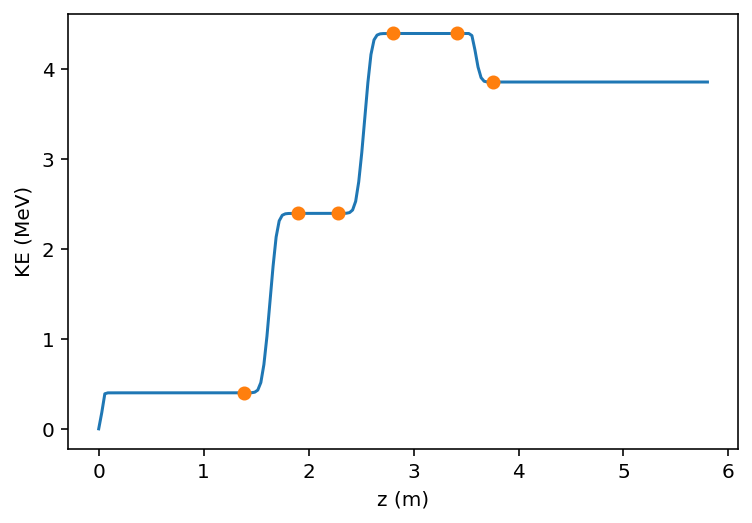

In [31]:
plt.plot(Gin.screen_stat('mean_z'), Gin.screen_stat('mean_kinetic_energy')/1e6);
plt.plot(zs, (p2e(pins)-MC2)/1e6,'o');
plt.xlabel('z (m)');
plt.ylabel('KE (MeV)');

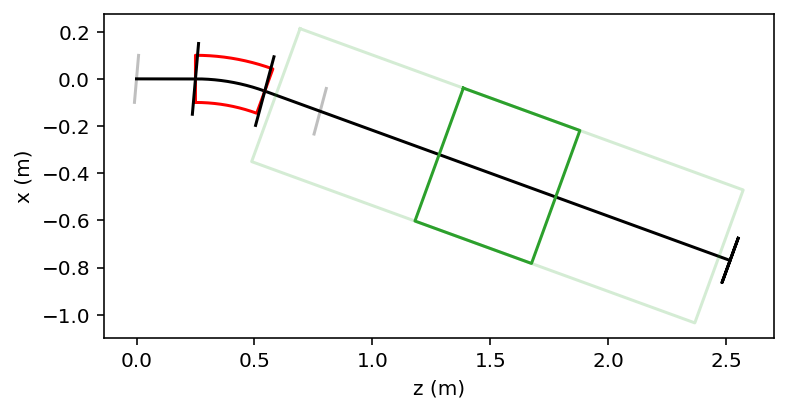

In [32]:
#------------------------------------------------------------------------------------------------
# Merger
#------------------------------------------------------------------------------------------------
p=pins[-1]

merger = Lattice('merger')

min_clearance = 0.0254     # [1"] meters
pipe_diameter = 2.0*0.0254 # [1"] meters

angle = -20
R = 0.8594366926962348
pipe_length=4.2

scale = 1

merger.add(Sectormagnet('b1', R, +angle, p, phi_in=np.abs(angle/4), phi_out=np.abs(angle/4), gap=0.05, fix=True), ds=0.25)
#merger.add(Sectormagnet('b2', R, -angle, p, phi_in=np.abs(angle/4), phi_out=np.abs(angle/4), gap=0.05, fix=True), ds=pipe_length)

merger.add(Map1D_B('sol4', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=+scale, field_pos='center'), ds=1.05, ref_element='b1', element_origin='center')
#merger.add(Map1D_B('sol5', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=-scale, field_pos='center'), ds=3.15, ref_element='b1', element_origin='center')
merger.add(Screen('scr1'), ref_element='b1', ds=2.1)
#merger.add(Screen('scr2'), ds=0.05)
    
merger.plot_floor();

In [29]:
in2merge = injector + merger

%time t1, p1, z1, s1, r1, G1 = autoscale1(in2merge, 0, p=100, workdir='temp') 


> Tracking: BEG:cav0
0 1.38 wcs /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp3fhhkhao/track_to_cav0.gpt.in
   energy gain: 399991.8381057344 eV.

> Phasing: cav0
   t_beg = 5.732480472292031e-09 sec.
   s_beg = 1.38 m.
   scale = 2000000.0.
   relative phase = 0 deg.

   t_end = 7.617863086403348e-09 m.
   s_end = 1.9 m.
   oncrest phase = 65.1271007984725
   energy gain =  1993777.183 eV.

> Tracking: cav0:cav1
1.9 2.2800000000000002 wcs temp/track_to_cav1.gpt.in
2.2800000000000002 2.2800000000000002
   energy gain: 7.374227255649466e-15 eV.

> Phasing: cav1
   t_beg = 8.905487212879339e-09 sec.
   s_beg = 2.2800000000000002 m.
   scale = 2000000.0.
   relative phase = 0 deg.

   t_end = 1.0657315302513159e-08 m.
   s_end = 2.8000000000000003 m.
   oncrest phase = -151.49305065218795
   energy gain =  1998953.330 eV.

> Tracking: cav1:cav2
2.8000000000000003 3.4124 wcs temp/track_to_cav2.gpt.in
3.4124 3.4124
   energy gain: -4.026337821976071e-14 eV.

> Phasing: cav2
   t_beg 

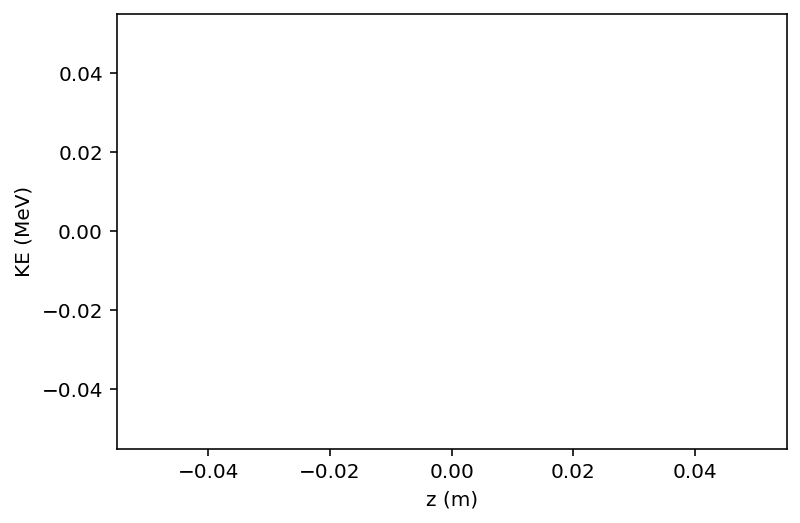

In [33]:
plt.plot(Gin.tout_ccs_stat('mean_z'), Gin.tout_ccs_stat('mean_kinetic_energy')/1e6);
#plt.plot(ss, (p2e(pins)-MC2)/1e6,'o');
plt.xlabel('z (m)');
plt.ylabel('KE (MeV)');

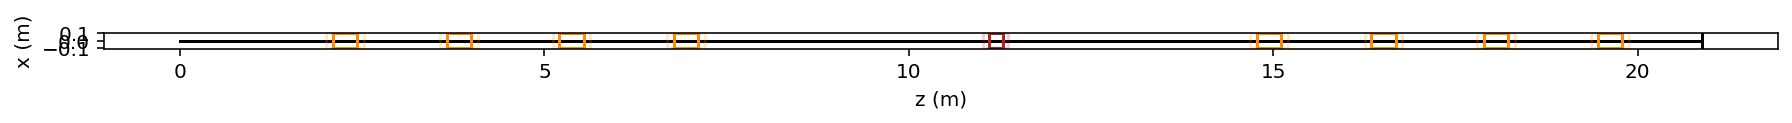

In [17]:
#------------------------------------------------------------------------------------------------
# Linac
#------------------------------------------------------------------------------------------------
    
energy_gain = 13.6e6-p2e(pins[-1])   

scale3 = energy_gain/9
scale1 = (energy_gain + scale3)/8
    
linac = Lattice('linac')             
             
linac.add(Map1D_TM('cav04', CAV0_FILE, frequency=f0, scale=scale1), ds=2)
linac.add(Map1D_TM('cav05', CAV0_FILE, frequency=f0, scale=scale1), ds=1.05)
linac.add(Map1D_TM('cav06', CAV0_FILE, frequency=f0, scale=scale1), ds=1.02)
linac.add(Map1D_TM('cav07', CAV0_FILE, frequency=f0, scale=scale1), ds=1.05)

linac.add(Map1D_TM('cav08', 
                   CAV3_FILE, 
                   frequency=f3, 
                   color='firebrick',
                   scale=scale3,
                   relative_phase=180), 
          ds=3.81715)

linac.add(Map1D_TM('cav09', CAV0_FILE, frequency=f0, scale=scale1), ds=3.31715)
linac.add(Map1D_TM('cav10', CAV0_FILE, frequency=f0, scale=scale1), ds=1.05)
linac.add(Map1D_TM('cav11', CAV0_FILE, frequency=f0, scale=scale1), ds=1.02)
linac.add(Map1D_TM('cav12', CAV0_FILE, frequency=f0, scale=scale1), ds=1.05)
linac.add(Screen('scr3'), ds=1.0)

plt.figure(figsize=(15,4));
linac.plot_floor();

In [18]:
%time ts, ps, zs, runs, G = autophase1(linac, 0, p=pins[-1]) 


> Tracking: BEG:cav04
0.0 2.0 wcs /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmprtp_r8_1/track_to_cav04.gpt.in
   energy gain: 9.220093488693237e-08 eV.

> Phasing: cav04
   t_beg = 6.7174822376603055e-09 sec.
   s_beg = 2 m.
   scale = 1282709.401179596.
   relative phase = 0 deg.

> Phasing: cav04
   t_beg = 6.7174822376603055e-09 sec.
   s_beg = 2 m.
   scale = 1282709.401179596.
   relative phase = 0 deg.

   t_end = 8.461387742558082e-09 m.
   s_end = 2.52 m.
   oncrest phase = 4.12144410691576
   energy gain =  1282310.987 eV.

   t_end = 8.461387742558082e-09 m.
   s_end = 2.52 m.
   oncrest phase = 4.12144410691576
   energy gain =  1282310.987 eV.

   Ellapsed time =  1.364 sec.

> Tracking: cav04:cav05
2.52 3.5700000000000003 wcs /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpg00hdxzt/track_to_cav05.gpt.in
   energy gain: -4.395362349474698e-13 eV.

> Phasing: cav05
   t_beg = 1.1978240223184877e-08 sec.
   s_beg = 3.5700000000000003 m.
   scale = 1282709.40117959

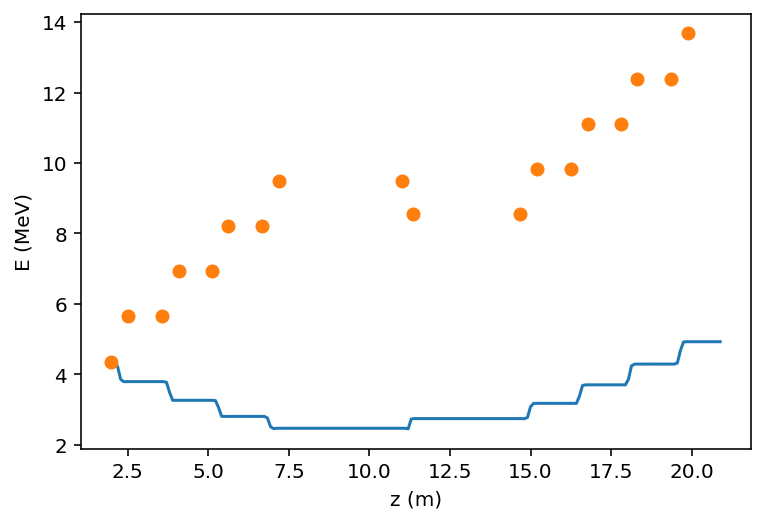

In [19]:
plt.plot(G.screen_stat('mean_z'), G.screen_stat('mean_energy')/1e6);
plt.plot(zs, p2e(ps)/1e6,'o');
plt.xlabel('z (m)');
plt.ylabel('E (MeV)');

In [20]:
lat = injector + merger + linac

In [21]:
# Check that phasing works on simple lattice with no bends:

from gpt.autoscale import autophase12
%time t1, p1, z1, run1, G1 = autophase12(injector, t=0, p=100)

ImportError: cannot import name 'autophase12' from 'gpt.autoscale' (/Users/colwyngulliford/Documents/GitHub/lume-gpt/gpt/autoscale.py)